# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
df = pd.read_csv('/Users/willwu/Desktop/NYU/CSCI-UA60/8-pandas-exploration-WillYuweiWu/data/san_diego_stopping.csv')

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

Show 5 rows, selected at random, from the data set. 

In [4]:
df.sample(5)

,raw_row_number,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,...,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
5871,6145,2014-01-21,12:30:00,310,26.0,black,male,vehicular,True,False,...,arrest,False,True,True,False,other,Search Incident To Arrest,Moving Violation,Other,BLACK
218308,225771,2015-09-05,14:25:00,440,29.0,hispanic,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Equipment Violation,Verbal Warning,HISPANIC
158057,164174,2015-03-02,20:45:00,520,30.0,hispanic,female,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,HISPANIC
157641,163742,2015-02-28,14:46:00,110,23.0,white,male,vehicular,False,False,...,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
306528,314639,2016-06-30,07:15:00,810,43.0,other,male,vehicular,False,True,...,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,OTHER


Show each of the column names and their data types. 

In [5]:
df.dtypes

raw_row_number                   object
date                             object
time                             object
service_area                     object
subject_age                     float64
subject_race                     object
subject_sex                      object
type                             object
arrest_made                      object
citation_issued                  object
warning_issued                   object
outcome                          object
contraband_found                 object
search_conducted                   bool
search_person                    object
search_vehicle                   object
search_basis                     object
reason_for_search                object
reason_for_stop                  object
raw_action_taken                 object
raw_subject_race_description     object
dtype: object

Show all different outcomes of a police stopping. 

In [6]:
df['outcome'].unique()

array(['citation', 'warning', nan, 'arrest'], dtype=object)

The potential outcomes of a police stopping include no outcome, citation issued, warning issued, or being arrested. 

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

According to the **README** file from the original website, the researchers have already performed a round of data munging. Therefore, only some slight additional munging is needed, as described below. 

The **raw_row_number** column is irrelevant to this project, and the **raw_action_taken** and **raw_subject_race_description** columns are redundant, so I will delete all three columnns. 

In [7]:
# Drop the selected columns. 
data = df.drop(columns = ['raw_row_number', 'raw_action_taken', 'raw_subject_race_description'])

# Display 5 sample rows.
data.sample(5)

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop
129842,2014-11-28,23:37:00,930,34.0,white,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Equipment Violation
32164,2014-03-13,10:31:00,610,25.0,black,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation
52898,2014-04-29,03:30:00,720,43.0,hispanic,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation
319985,2016-08-24,22:20:00,710,18.0,hispanic,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation
39846,2014-03-31,17:30:00,240,29.0,asian/pacific islander,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

**1. Descriptive Statistics of Subject Age**

This analysis will provide basic statistics for the subject ages, including mean and standard deviation. 

In [8]:
data['subject_age'].describe()

count    371064.000000
mean         37.095956
std          14.183295
min          10.000000
25%          25.000000
50%          34.000000
75%          47.000000
max         100.000000
Name: subject_age, dtype: float64

Note that according to the original description of the data set, values outside the range of 10-110 are coerced to N/A. Thus, the min and max are actually 10 and 100, which is quite suprising.  

**2. Count of Stops by Race**

This analysis will count the number of stops for each racial group. 

In [9]:
data['subject_race'].value_counts()

white                     162226
hispanic                  117083
black                      42705
asian/pacific islander     32541
other                      27238
Name: subject_race, dtype: int64

**3. Proportion of Stops Resulting in Arrests by Race**

This analysis will group the data by **subject_race** and calculate the proportion of stops that result in an arrest for each race.

In [10]:
data.groupby('subject_race')['arrest_made'].mean().sort_values(ascending = False)

subject_race
black                     0.021726
hispanic                  0.016527
white                     0.011836
asian/pacific islander    0.010286
other                     0.006513
Name: arrest_made, dtype: float64

According to the analysis, black has the highest proportion of being arrested given having been stopped by police (about 2.17%), followed by hispanic (about 1.65%), white (about 1.18%), asian/pacific islander (about 1.03%), and other (about 0.65%).  

**4. Average Age of Subjects by Outcome**

Calculate the average age of subjects grouped by the outcome of the stopping. 

In [11]:
data.groupby('outcome')['subject_age'].mean()

outcome
arrest      34.150605
citation    37.181326
warning     37.104228
Name: subject_age, dtype: float64

**5. Frequency of Search Conducted by Service Area**

This analysis explores how often searches are conducted within each service area. 

In [12]:
data.groupby('service_area')['search_conducted'].mean().sort_values(ascending = False)

service_area
Bulletin    0.653846
County      0.404762
830         0.111170
440         0.107294
510         0.095388
820         0.090968
430         0.089688
810         0.054347
720         0.042398
620         0.041382
530         0.040062
840         0.035714
610         0.034949
120         0.034276
110         0.031523
520         0.030630
320         0.027164
Unknown     0.025356
630         0.024876
240         0.024422
310         0.023198
930         0.021978
710         0.020765
230         0.019649
130         0.011111
Name: search_conducted, dtype: float64

The previous analysis provides a sorted list showing the service areas with the highest to lowest proportion of stops involving a search. It could help identifying areas with more intensive police searching activities. 

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

**1. Bar Chart of Stops by Race**

This bar chart will display the count of stops for each racial group. 

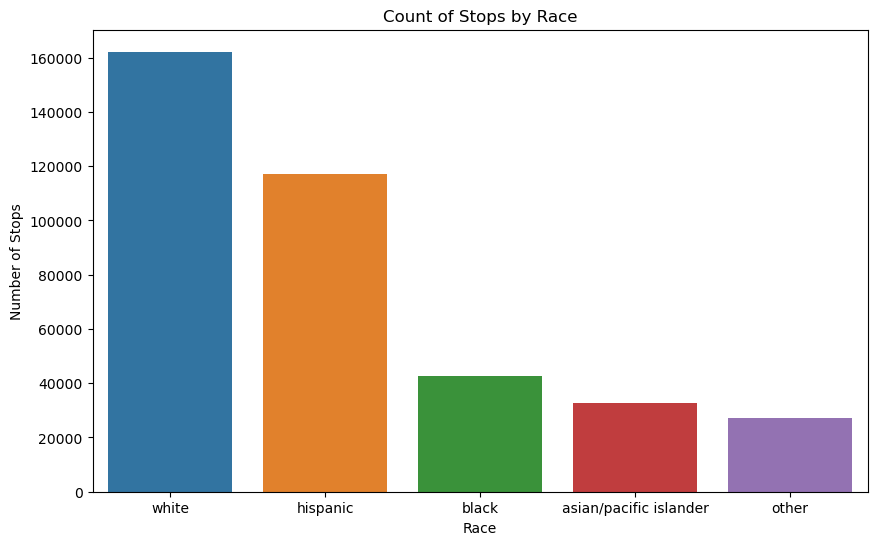

In [13]:
import seaborn as sns

plt.figure(figsize = (10, 6))
race_counts = data['subject_race'].value_counts()
sns.barplot(x = race_counts.index, y = race_counts.values)
plt.title('Count of Stops by Race')
plt.xlabel('Race')
plt.ylabel('Number of Stops')
plt.show()

**2. Pie Chart of Outcomes**

The pie chart shows the distribution of different outcomes of the stops. 

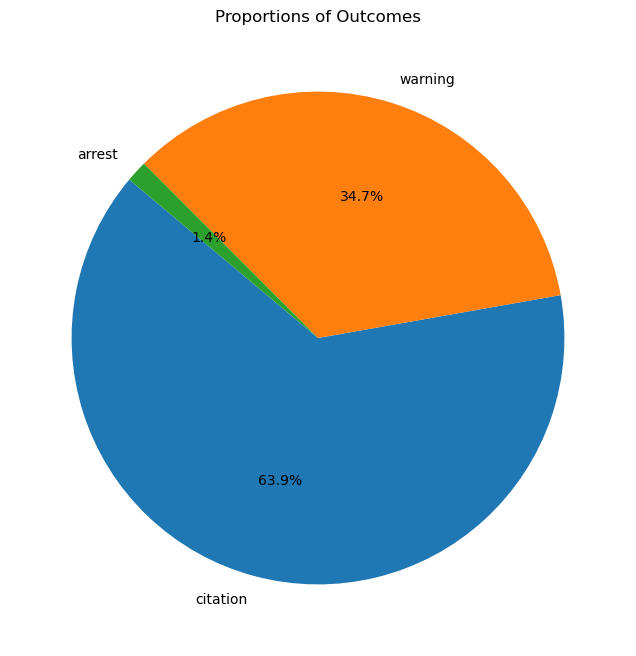

In [14]:
outcome_counts = data['outcome'].value_counts()

plt.figure(figsize = (8, 8))
plt.pie(outcome_counts, labels = outcome_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Proportions of Outcomes')
plt.show()

**3. Histogram of Subject Ages**

This histogram provides a distribution of the ages of subjects stopped. 

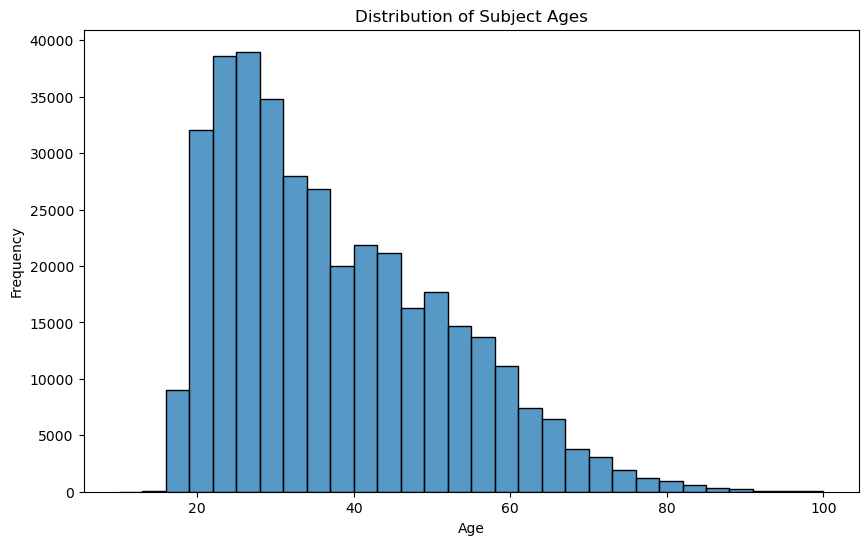

In [15]:
plt.figure(figsize = (10, 6))
sns.histplot(data['subject_age'], bins = 30)
plt.title('Distribution of Subject Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**4. Box Plot of Subject Age by Race**

The box plot provides a comparison of age distributions across different races, showing median, quartiles, and outliers. 

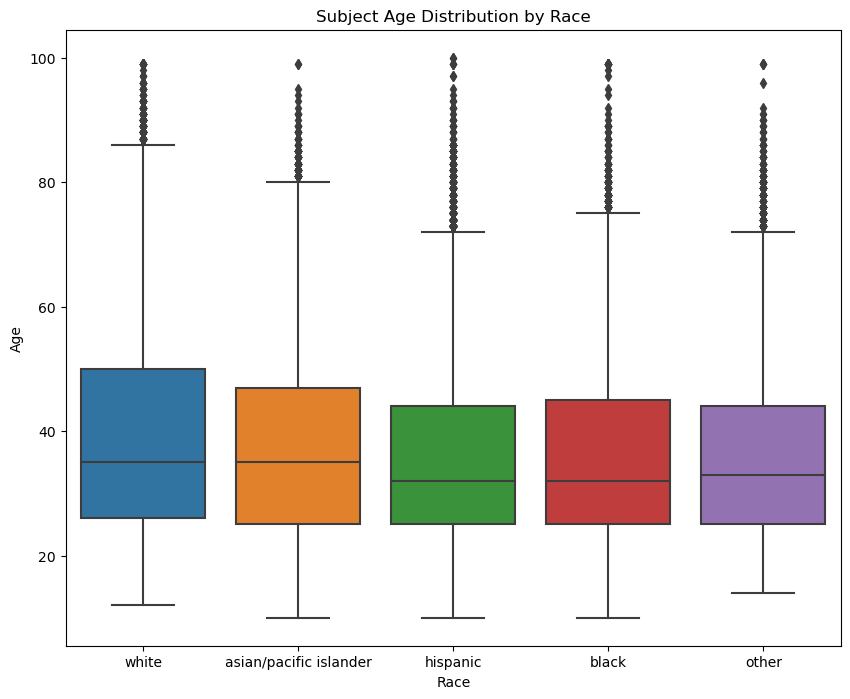

In [19]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = 'subject_race', y = 'subject_age')
plt.title('Subject Age Distribution by Race')
plt.ylabel('Age')
plt.xlabel('Race')
plt.show()

**5. Stacked Area Chart of Outcomes by Month**

This visualization shows how the outcomes of stops (citation, warning, arrest) have changed over time by month. 

<Figure size 1000x600 with 0 Axes>

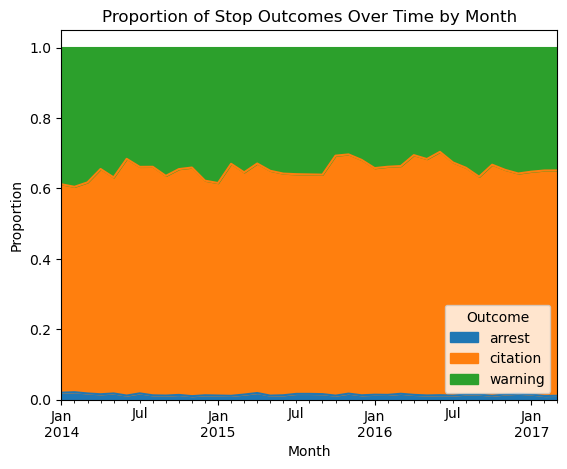

In [20]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace = True)
monthly_outcome_data = data.groupby([pd.Grouper(freq = 'M'), 'outcome']).size().unstack(fill_value = 0)
monthly_proportions = monthly_outcome_data.divide(monthly_outcome_data.sum(axis = 1), axis = 0)

plt.figure(figsize = (10, 6))
monthly_proportions.plot(kind = 'area', stacked = True)
plt.title('Proportion of Stop Outcomes Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.legend(title = 'Outcome')
plt.show()